<a href="https://colab.research.google.com/github/Algi21/Supervised-Learning-Classification/blob/main/Homework_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.0.2
pandas version :  2.2.2
seaborn version :  0.13.2


In [ ]:
import pandas as pd

# Atur opsi tampilan pandas sebelum membaca data atau menampilkan DataFrame
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.width', 1000)      # Atau angka yang lebih besar sesuai kebutuhan lebar layar Anda

# Original Google Drive sharing link
google_drive_sharing_link = "https://drive.google.com/file/d/1IX_RSFp8QbZmULWTvAKZcNWsv3sKiQ6t/view?usp=sharing"

# Extract the file ID from the sharing link
file_id = google_drive_sharing_link.split('/')[-2]

# Construct the direct download link
direct_download_link = f"https://drive.google.com/uc?export=download&id={file_id}"

# Import the data using pandas.read_csv() dan simpan ke variabel df
df = pd.read_csv(direct_download_link)

# Sekarang df sudah didefinisikan, sehingga Anda bisa memanggil head()
df.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.2,No


#Exploratory Data Analysis

Definisi tiap kolom :
* customerID : Pengidentifikasi unik untuk tiap pelanggan
* gender : jenis kelamin pelanggan
* SeniorCitizen : Menunjukkan apakah pelanggan adalah warga senior atau bukan. Nilai '0' kemungkinan berarti bukan warga senior, dan '1' berarti warga senior. Ini sering digunakan dalam konteks demografi atau penawaran khusus
* Partner : Menunjukkan apakah pelanggan memiliki pasangan atau tidak. Nilai 'Yes' berarti mereka memiliki pasangan, dan 'No' berarti tidak
* Dependents : Menunjukkan apakah pelanggan memiliki tanggungan (misalnya anak-anak, orang tua lanjut usia yang bergantung) atau tidak. Nilai 'Yes' berarti mereka memiliki tanggungan, dan 'No' berarti tidak
* tenure : lamanya waktu (biasanya dalam bulan) seorang pelanggan telah menjadi pelanggan perusahaan tersebut
* PhoneService : Menunjukkan apakah pelanggan berlangganan layanan telepon dari perusahaan tersebut. Nilai 'Yes' berarti berlangganan, dan 'No' berarti tidak
* MultipleLines : Menunjukkan apakah pelanggan memiliki beberapa saluran telepon (nomor telepon) sebagai bagian dari layanan telepon mereka
* InternetService : Mengindikasikan jenis layanan internet yang dilanggan oleh pelanggan. Nilai yang Mungkin: 'DSL', 'Fiber optic', atau 'No' (tidak memiliki layanan internet)
* OnlineSecurity : Menunjukkan apakah pelanggan berlangganan layanan keamanan online tambahan.Yes', 'No', atau 'No internet service' (jika tidak memiliki layanan internet, maka tidak relevan untuk keamanan online).
* OnlineBackup : Menunjukkan apakah pelanggan berlangganan layanan pencadangan online.  'Yes', 'No', atau 'No internet service'.
* DeviceProtection : Menunjukkan apakah pelanggan berlangganan layanan perlindungan perangkat untuk perangkat mereka. 'Yes', 'No', atau 'No internet service'.
* TechSupport : Menunjukkan apakah pelanggan berlangganan layanan dukungan teknis premium.'Yes', 'No', atau 'No internet service'.
* StreamingTV : Menunjukkan apakah pelanggan berlangganan layanan streaming TV.Nilai yang Mungkin: 'Yes', 'No', atau 'No internet service'.
* StreamingMovies : Menunjukkan apakah pelanggan berlangganan layanan streaming film.'Yes', 'No', atau 'No internet service'.
* Contract : Menunjukkan jenis kontrak yang dimiliki pelanggan dengan perusahaan.Nilai yang Mungkin: 'Month-to-month' (bulanan), 'One year' (satu tahun), 'Two year' (dua tahun).
* PaperlessBilling : Menunjukkan apakah pelanggan memilih untuk menerima tagihan tanpa kertas (elektronik) atau tagihan fisik.
*PaymentMethod : Metode pembayaran yang digunakan pelanggan untuk tagihan mereka.
* MonthlyCharges : Jumlah biaya yang dibebankan kepada pelanggan setiap bulan.
* TotalCharges : Total biaya yang telah dibebankan kepada pelanggan selama masa berlangganan mereka.
* Churn :  variabel target (target variable) yang menunjukkan apakah pelanggan telah "churn" (berhenti berlangganan) atau tidak.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Tambahan
# Karena SeniorCitizen nilainya '0' dan '1', sebenarnya merupakan kategorikal. Agar perlakuan sama dengan feature kategorikal lain yang hanya mempunyai 2 value, maka dilakukan mapping '0'='No' dan '1'='Yes' serta dilakukan perubahan Data Type menjadi "object"
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes', 0:'No'})

# Ubah tipe data SeniorCitizen menjadi object
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

Karena SeniorCitizen nilainya '0' dan '1', sebenarnya merupakan kategorikal. Agar perlakuan sama dengan feature kategorikal lain yang hanya mempunyai 2 value, maka dilakukan mapping '0'='No' dan '1'='Yes' serta dilakukan perubahan Data Type menjadi "object"

In [ ]:
# List untuk menyimpan nama kolom berdasarkan jenisnya
numerical_features = []
categorical_features = []
id_columns = ['customerID'] # Langsung inisialisasi sebagai list berisi 'customerID'


# Loop melalui kolom dan dtipe-nya
for col in df.columns:
    # Periksa apakah kolom saat ini ada di dalam list id_columns
    if col in id_columns:
        continue # Lewati kolom ID karena sudah diidentifikasi

    if df[col].dtype == 'object':
        categorical_features.append(col)
    elif df[col].dtype == 'int64' or df[col].dtype == 'float64':
        numerical_features.append(col)

print("Kolom Numerik (Numerical Features):")
print(numerical_features)
print(f"Jumlah Kolom Numerik: {len(numerical_features)}\n")

print("Kolom Kategorikal (Categorical Features):")
print(categorical_features)
print(f"Jumlah Kolom Kategorikal: {len(categorical_features)}\n")

print("Kolom ID:")
print(id_columns)
print(f"Jumlah Kolom ID: {len(id_columns)}")

# total kolom yang diproses
total_processed_columns = len(numerical_features) + len(categorical_features) + len(id_columns)
print(f"\nTotal kolom yang diproses: {total_processed_columns}")
print(f"Total kolom dalam DataFrame asli: {df.shape[1]}")

Kolom Numerik (Numerical Features):
['tenure', 'MonthlyCharges']
Jumlah Kolom Numerik: 2

Kolom Kategorikal (Categorical Features):
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Jumlah Kolom Kategorikal: 18

Kolom ID:
['customerID']
Jumlah Kolom ID: 1

Total kolom yang diproses: 21
Total kolom dalam DataFrame asli: 21


In [ ]:
df[categorical_features].describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


# Handling Missing Value

In [ ]:
# Ubah tipe data

# ubah menjadi float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# data yang null
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Terdapat nilai null pada kolom TotalCharges sebanyak 11, akan dilakukan analisis mengapa 11 kolom tersebut berisi nilai null

In [ ]:
# Filter DataFrame untuk menampilkan baris dengan NaN di 'TotalCharges' ---
print("\nBaris-baris dengan nilai null pada kolom 'TotalCharges':")
rows_with_null_totalcharges = df[df['TotalCharges'].isnull()]
rows_with_null_totalcharges



Baris-baris dengan nilai null pada kolom 'TotalCharges':


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Berdasarkan tabel, terlihat bahwa sangat besar kemungkinan 11 nilai null di TotalCharges ini adalah pelanggan yang baru berlangganan (memiliki tenure  0). Pelanggan ini belum memiliki total biaya terakumulasi yang tercatat. Dalam kasus seperti itu, nilai TotalCharges yang kosong sebenarnya berarti 0.

Oleh karena itu, mengisi nilai null dengan 0 adalah pilihan yang paling logis dan disarankan untuk kolom TotalCharges.

In [ ]:
# Buat salinan DataFrame sebelum melakukan perubahan
df_processed = df.copy()

# isi nilai NaN (yang berjumlah 11) dengan 0 pada df_processed
df_processed['TotalCharges'] = df_processed['TotalCharges'].fillna(0)

df_processed.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Ubah kolom Churn menjadi numerik
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_processed['Churn'] = le.fit_transform(df_processed['Churn'])

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Cek duplikasi
df_processed.duplicated().sum()

np.int64(0)

tidak ada baris yang duplikat yang ditemukan

In [ ]:
df_processed.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Deskripsi Statistik

In [ ]:
df_processed.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.265370
std,24.559481,30.090047,2266.794470,0.441561
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


Insight :
1. General (Untuk Semua Variabel):

count (Jumlah Data): Semua kolom memiliki 7043 entri, menunjukkan tidak ada missing values (nilai yang hilang) di kolom-kolom ini. Ini konsisten dengan analisis sebelumnya.
2. tenure (Durasi Berlangganan dalam bulan):

Rentang: Durasi berlangganan bervariasi dari 0 bulan (pelanggan baru) hingga 72 bulan (6 tahun).
Rata-rata vs. Median: mean (32.37) sedikit lebih tinggi dari 50% (median) (29.00). Ini menunjukkan bahwa rata-rata ditarik sedikit ke atas oleh beberapa pelanggan dengan tenure yang sangat tinggi.
Variasi: std 24.55 menunjukkan variasi yang signifikan dalam durasi berlangganan pelanggan.
Kemungkinan Skewness:
Karena mean > median, ada kemungkinan sedikit miring ke kanan (positively skewed). Artinya, ada ekor yang lebih panjang di sisi nilai tenure yang lebih tinggi, meskipun perbedaannya tidak terlalu dramatis. Bisa juga mengindikasikan adanya kelompok pelanggan yang sangat loyal.
3. MonthlyCharges (Biaya Bulanan):

Rentang: Biaya bulanan berkisar dari 18.25 hingga 118.75.
Rata-rata vs. Median: mean (64.76) sedikit lebih rendah dari 50% (median) (70.35). Ini menunjukkan bahwa rata-rata ditarik sedikit ke bawah.
Variasi: std 30.09 menunjukkan variasi yang signifikan dalam biaya bulanan.
Kemungkinan Skewness:
Karena mean < median, ada kemungkinan sedikit miring ke kiri (negatively skewed). Artinya, ada ekor yang lebih panjang di sisi nilai biaya bulanan yang lebih rendah, atau ada lebih banyak pelanggan yang membayar di sisi biaya yang lebih tinggi.
4. TotalCharges (Total Biaya Selama Berlangganan):

Rentang: Total biaya bervariasi dari 0.00 (kemungkinan pelanggan baru yang belum sempat melakukan pembayaran atau yang baru memulai layanan dan belum memiliki tagihan total) hingga 8684.80.
Rata-rata vs. Median: mean (2279.73) jauh lebih tinggi dari 50% (median) (1394.55). Perbedaan yang signifikan ini adalah indikator utama.
Variasi: std 2266.79 sangat besar, bahkan hampir sama dengan rata-rata. Ini menunjukkan variasi yang ekstrem dalam total biaya.
Kuartil: Jarak antara min dan 25% (398.55) lebih kecil dibandingkan jarak antara 75% (3786.60) dan max.
Kemungkinan Skewness:
Karena mean jauh lebih besar dari median, distribusi TotalCharges kemungkinan besar sangat miring ke kanan (strongly positively skewed). Ini berarti sebagian besar pelanggan memiliki total biaya yang relatif rendah, tetapi ada sejumlah kecil pelanggan yang sudah berlangganan sangat lama dan/atau memiliki biaya bulanan yang sangat tinggi, sehingga menarik rata-rata jauh ke atas. Adanya nilai min 0.00 (pelanggan baru) juga berkontribusi pada kemiringan ini.

In [ ]:
df_processed.describe(include ='object')

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,3186-AJIEK,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


 Secara demografis, jumlah pelanggan pria dan wanita relatif seimbang, namun menariknya, mayoritas pelanggan tidak memiliki partner dan tidak memiliki tanggungan. Sebagian besar pelanggan menggunakan layanan telepon, meskipun hanya sebagian kecil yang memiliki fitur multi-jalur. Dalam hal internet, fiber optik menjadi pilihan utama, namun sayangnya, sebagian besar pelanggan belum memanfaatkan layanan tambahan seperti keamanan online atau streaming, yang bisa menjadi peluang besar bagi kita untuk menawarkan produk tambahan. Pola kontrak menunjukkan dominasi skema bulanan, yang berarti pelanggan memiliki fleksibilitas tinggi namun juga meningkatkan risiko mereka untuk berhenti berlangganan. Untungnya, banyak pelanggan sudah beralih ke tagihan tanpa kertas, dengan sebagian besar memilih pembayaran melalui cek elektronik

# Univariate Analysis


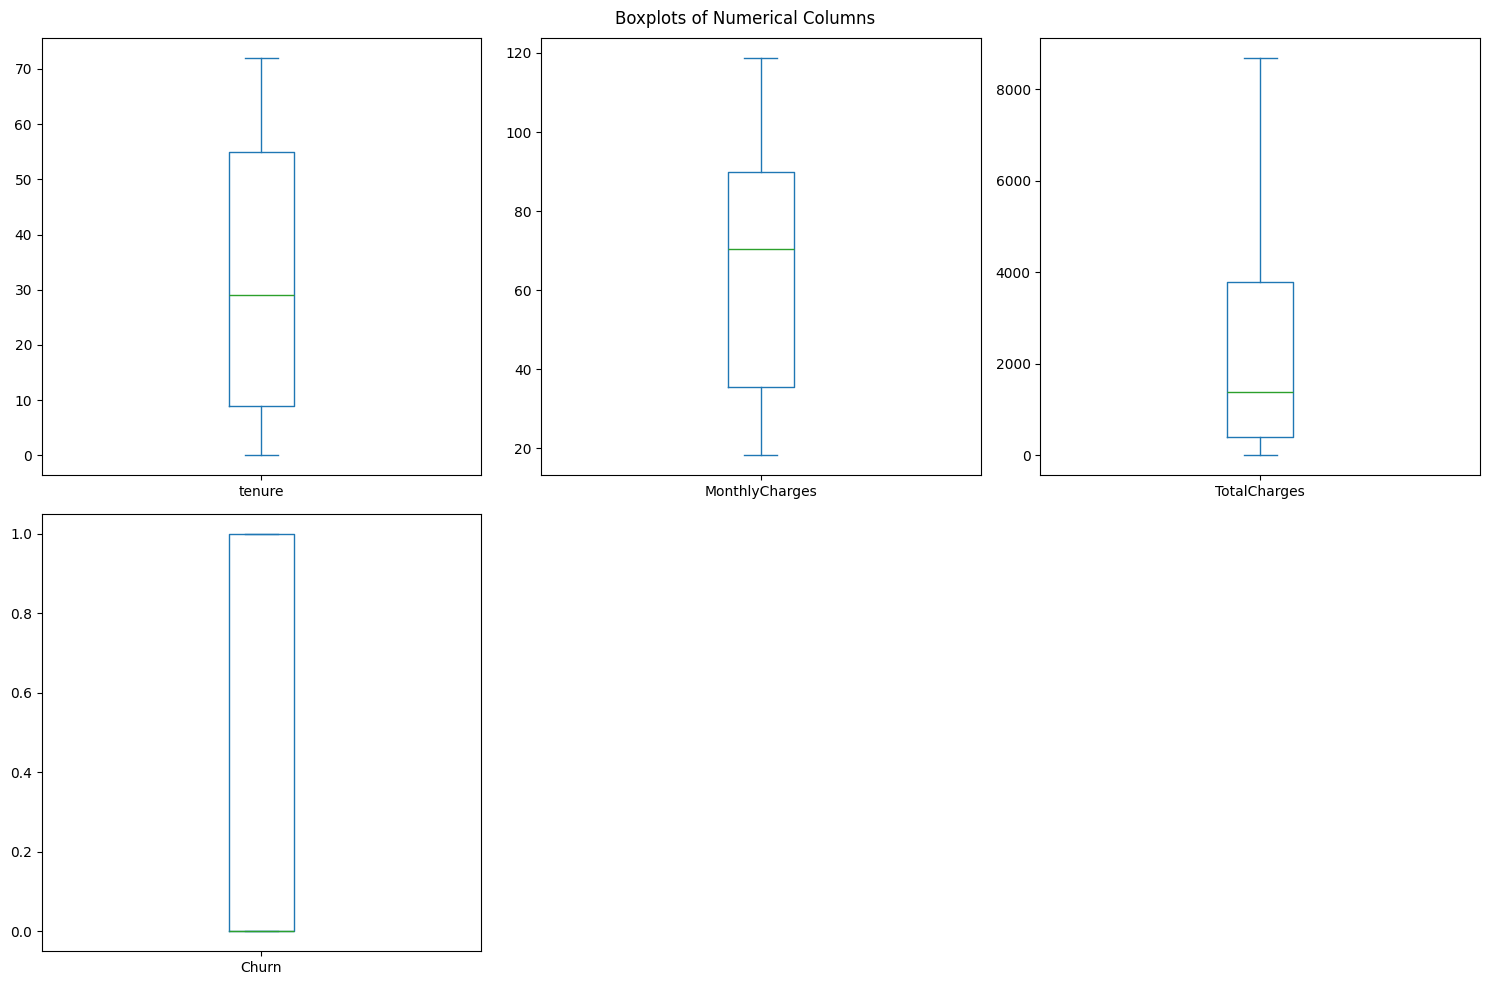

In [ ]:
#Diagram Boxplot
# Ambil hanya kolom numerik dari DataFrame
numerical_df = df_processed.select_dtypes(include=['int64', 'float64'])

# Buat boxplot untuk semua kolom numerik
numerical_df.plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10), sharex=False, sharey=False)

plt.suptitle('Boxplots of Numerical Columns')
plt.tight_layout()
plt.show()


1. tenure (Durasi Berlangganan):

Median (garis hijau di dalam kotak) berada di sekitar 30 bulan. Ini berarti setengah dari pelanggan telah berlangganan kurang dari 30 bulan.
Kotak (IQR - Interquartile Range) membentang dari sekitar 10 bulan hingga 55 bulan. Ini menunjukkan 50% pelanggan berada dalam rentang durasi berlangganan ini.
Panjang "whisker" (garis dari kotak) yang cukup panjang ke atas dan ke bawah menunjukkan rentang durasi yang luas, dari pelanggan baru (mendekati 0) hingga yang sangat lama (mendekati 70 bulan).
Tidak ada outlier yang terlihat jelas di luar whisker, menunjukkan distribusinya cukup merata dalam rentang yang wajar.
Distribusi/Skewness: Garis median sedikit di bawah tengah kotak, dan whisker atas sedikit lebih panjang dari whisker bawah. Ini menunjukkan distribusi tenure memiliki sedikit kemiringan ke kanan (positively skewed). Ada lebih
banyak pelanggan dengan tenure yang lebih pendek dibandingkan tenure yang sangat panjang.
2. MonthlyCharges (Biaya Bulanan):

Median (garis hijau di dalam kotak) berada di sekitar 70. Ini berarti setengah dari pelanggan membayar biaya bulanan kurang dari sekitar 70.
Kotak (IQR) membentang dari sekitar 35 hingga 90. Ini menunjukkan 50% pelanggan memiliki biaya bulanan dalam rentang ini.
Ada rentang yang luas dari biaya bulanan, dari yang sangat rendah (mendekati 20) hingga yang sangat tinggi (mendekati 120).
Tidak ada outlier yang terlihat jelas.
Distribusi/Skewness: Garis median sedikit di atas tengah kotak. Whisker bawah terlihat sedikit lebih pendek dari whisker atas (meskipun tidak terlalu dramatis). Ini menunjukkan distribusi MonthlyCharges memiliki sedikit kemiringan ke kiri (negatively skewed). Artinya, ada konsentrasi pelanggan di sisi biaya yang lebih tinggi, dan ekor distribusinya memanjang ke sisi biaya yang lebih rendah.
3. TotalCharges (Total Biaya):

Median (garis hijau di dalam kotak) berada di sekitar 1500. Ini berarti setengah dari pelanggan memiliki total biaya kurang dari sekitar 1500.
Kotak (IQR) membentang dari sekitar 400 hingga 3800. Ini menunjukkan 50% pelanggan memiliki total biaya dalam rentang ini.
Ada rentang yang sangat luas untuk TotalCharges, dari 0 hingga lebih dari $8000.
TotalCharges memiliki sejumlah besar outlier di bagian atas (titik-titik di atas whisker atas). Ini menunjukkan ada beberapa pelanggan dengan total biaya yang sangat tinggi yang jauh dari sebagian besar data lainnya. Ini wajar karena TotalCharges sangat bergantung pada tenure dan MonthlyCharges.
Distribusi/Skewness: Median (sekitar 1500) sangat jauh di bawah pusat kotak (sekitar 2100), dan whisker atas jauh lebih panjang dari whisker bawah, dengan banyak outlier di sisi atas. Ini adalah indikasi kuat bahwa distribusi TotalCharges sangat miring ke kanan (strongly positively skewed). Mayoritas pelanggan memiliki total biaya yang relatif rendah, sementara hanya sedikit pelanggan yang memiliki total biaya yang sangat besar (kemungkinan besar mereka adalah pelanggan lama dengan biaya bulanan tinggi).

4. Churn

Bentuk boxplot yang sangat tidak simetris, dengan sebagian besar data terkonsentrasi pada 0 dan hanya sebagian kecil pada 1, menunjukkan distribusi yang sangat miring ke kanan (positively skewed). Artinya, jumlah pelanggan yang tidak churn jauh lebih banyak daripada pelanggan yang churn.

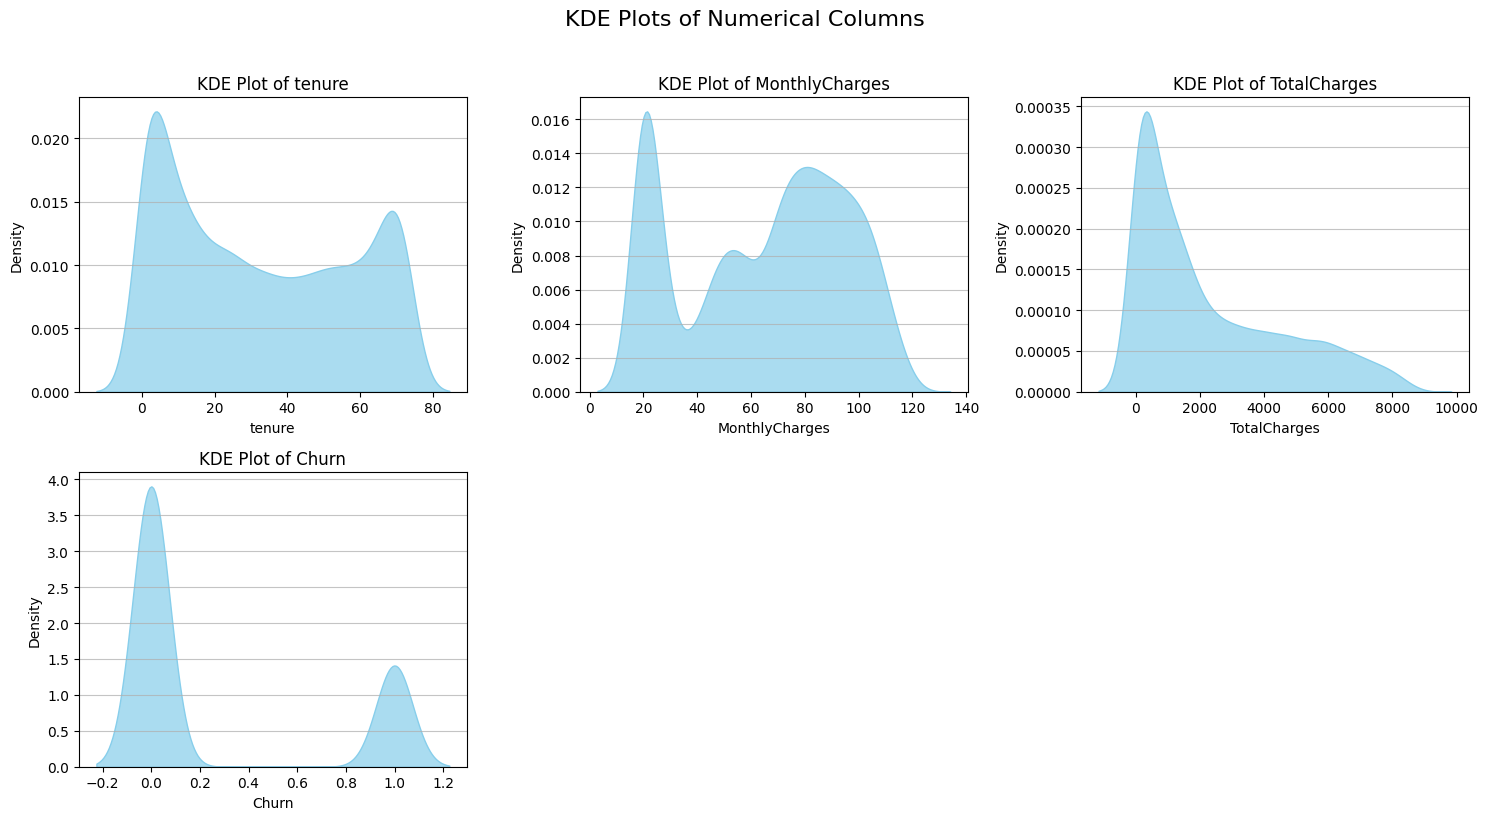

In [ ]:

# Pilih hanya kolom numerik untuk KDE plot
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Karena SeniorCitizen dan Churn adalah biner, kadang lebih baik memisahkannya dari plot KDE kontinu
# bisa membuat plot individual atau subplot untuk semua.
# Untuk tujuan demonstrasi, akan membuat subplot untuk semua.

# Tentukan jumlah baris dan kolom untuk subplot
n_cols = 3 # Jumlah kolom dalam grid plot
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols # Hitung jumlah baris yang diperlukan

plt.figure(figsize=(n_cols * 5, n_rows * 4))
plt.suptitle('KDE Plots of Numerical Columns', y=1.02, fontsize=16) # Judul utama

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(df_processed[col], fill=True, color='skyblue', alpha=0.7)
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()



1. KDE Plot of tenure:

Insight: Plot ini menunjukkan distribusi yang multimodal (memiliki beberapa puncak).
Ada puncak yang signifikan di dekat 0 (pelanggan baru), menunjukkan banyak pelanggan yang baru bergabung atau memiliki durasi langganan yang sangat singkat.
Ada juga puncak yang cukup jelas di sekitar 70-an bulan (pelanggan yang sangat loyal/lama).
Terdapat "lembah" atau penurunan kepadatan di tengah-tengah, menunjukkan bahwa mungkin ada kelompok pelanggan yang tidak berada dalam kategori "sangat baru" atau "sangat lama", atau transisi di antara kelompok-kelompok tersebut.
Interpretasi Skewness: Secara keseluruhan, distribusi ini tampak sedikit miring ke kiri (negatively skewed) karena puncak yang lebih tinggi berada di ujung kanan, namun bentuk multimodal membuatnya tidak sesederhana itu. Ini lebih menggambarkan segmen pelanggan yang berbeda berdasarkan durasi berlangganan.
2. KDE Plot of MonthlyCharges:

Insight: Plot ini juga menunjukkan distribusi yang multimodal, dengan dua puncak utama.
Satu puncak di sekitar 20-30 (kemungkinan mewakili pelanggan dengan paket dasar atau hanya layanan telepon/internet tunggal).
Puncak kedua yang lebih besar dan menyebar luas di sekitar 70-100 (kemungkinan mewakili pelanggan dengan paket bundel, internet kecepatan tinggi, atau layanan tambahan).
Ada "lembah" di antara kedua puncak tersebut.
Interpretasi Skewness: Karena puncak di sisi kanan lebih tinggi dan menyebar lebih luas, distribusi ini cenderung sedikit miring ke kiri (negatively skewed), meskipun keberadaan dua puncak yang jelas menunjukkan bahwa ini lebih tentang kelompok pelanggan dengan pola biaya yang berbeda.
3. KDE Plot of TotalCharges:

Insight: Plot ini menunjukkan distribusi yang sangat jelas miring ke kanan (positively skewed).
Ada puncak yang sangat tinggi di dekat 0, menunjukkan banyak pelanggan dengan total biaya yang rendah. Ini termasuk pelanggan baru atau mereka yang churned sangat cepat.
Kurva kemudian menurun tajam dan memiliki "ekor" yang panjang dan landai ke arah nilai TotalCharges yang lebih tinggi (hingga $8000+). Ini menunjukkan semakin sedikit pelanggan yang memiliki total biaya yang sangat tinggi.
Interpretasi Skewness: Sangat miring ke kanan (strongly positively skewed). Ini berarti sebagian besar data terkonsentrasi pada nilai total biaya yang lebih rendah, dengan hanya sedikit pelanggan yang memiliki total biaya kumulatif yang sangat besar.
4. KDE Plot of Churn:

Insight: Mirip dengan SeniorCitizen, plot ini menunjukkan dua puncak yang berbeda.
Puncak yang sangat tinggi di sekitar 0, menunjukkan bahwa mayoritas pelanggan tidak melakukan churn (tetap menjadi pelanggan).
Puncak yang lebih kecil (tetapi signifikan) di sekitar 1, menunjukkan adanya proporsi pelanggan yang melakukan churn.
Interpretasi Skewness: Distribusi ini sangat miring ke kanan (positively skewed). Ini menggambarkan ketidakseimbangan kelas (class imbalance) di mana kelas "tidak churn" (0) jauh lebih dominan daripada kelas "churn" (1).

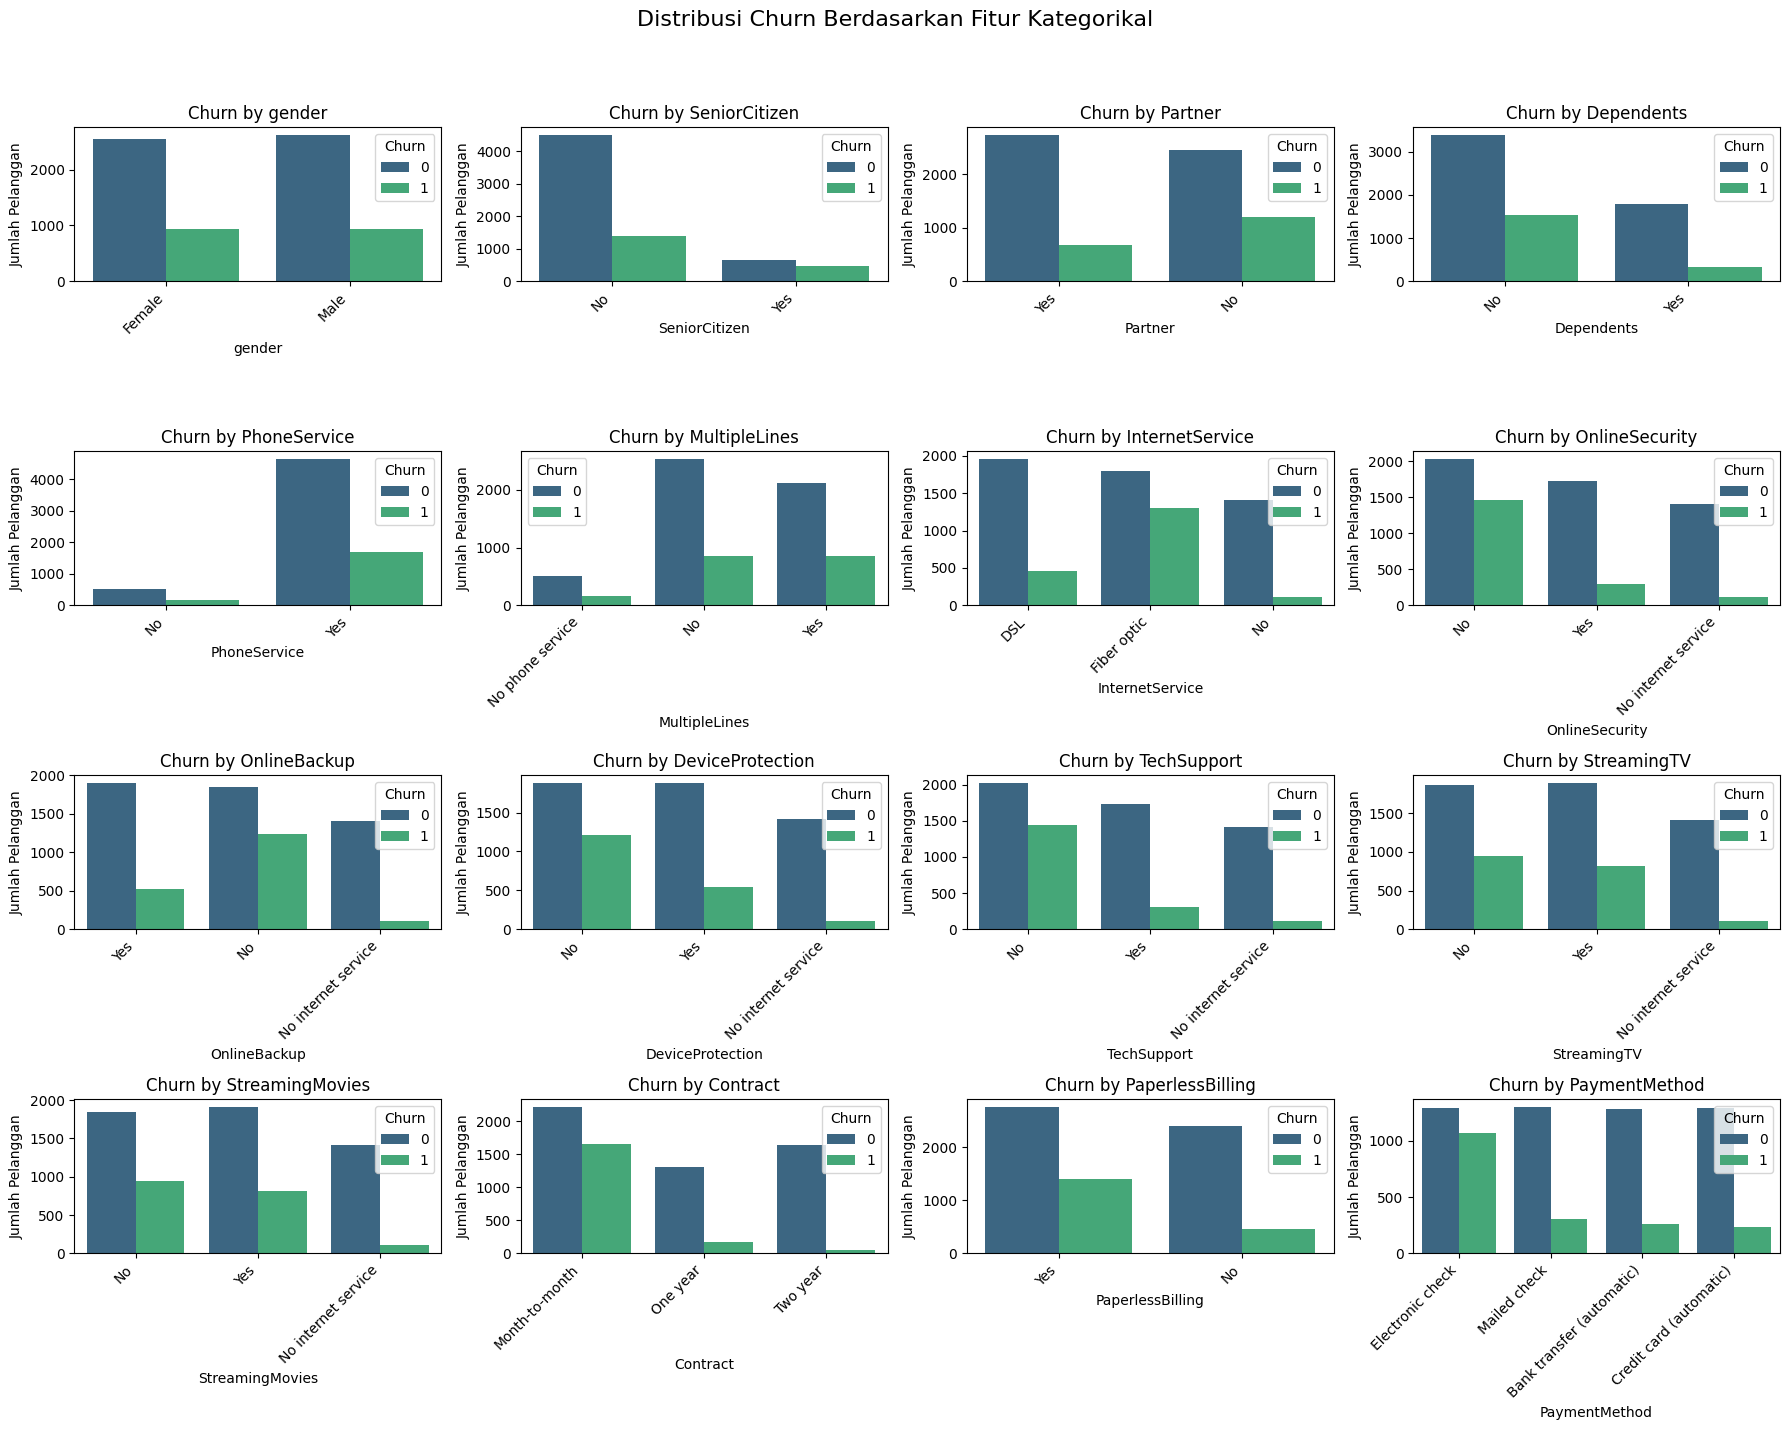

In [ ]:
categorical_cols = [
   'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
]

# --- Kode Plotting yang Anda minta ---
plt.figure(figsize=(18, 15))
plt.suptitle('Distribusi Churn Berdasarkan Fitur Kategorikal', fontsize=16)

# Sesuaikan jumlah baris dan kolom subplot secara dinamis
# Misalnya, 4 kolom per baris
n_cols_plot = 4
n_rows_plot = (len(categorical_cols) + n_cols_plot - 1) // n_cols_plot

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows_plot, n_cols_plot, i + 1)
    # Gunakan countplot untuk melihat jumlah dan proporsi
    sns.countplot(data=df_processed, x=col, hue='Churn', palette='viridis')
    plt.title(f'Churn by {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah Pelanggan')
    plt.xticks(rotation=45, ha='right') # Rotasi label x agar tidak tumpang tindih

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

* Selain OnlineSecurity dan OnlineBackup yang sudah teridentifikasi, layanan DeviceProtection, TechSupport, StreamingTV, dan StreamingMovies juga secara konsisten menunjukkan bahwa pelanggan yang berlangganan layanan tambahan ini cenderung lebih loyal dan kecil kemungkinan untuk churn. Ini menekankan pentingnya menawarkan paket bundel atau mendorong adopsi layanan tambahan.
* Jenis kontrak adalah prediktor churn yang paling dominan. Pelanggan dengan kontrak bulanan memiliki risiko churn yang sangat tinggi, sementara kontrak satu dan dua tahun sangat efektif dalam menahan pelanggan.
* Penggunaan Electronic check merupakan sinyal peringatan churn yang kuat, sedangkan metode pembayaran otomatis mengindikasikan retensi yang lebih tinggi.
* Pelanggan paperless billing menunjukkan tingkat churn yang lebih tinggi, yang mungkin mengindikasikan segmen pelanggan yang lebih sadar teknologi dan fleksibel dalam pilihan layanan mereka.

# Multivariate Analysis

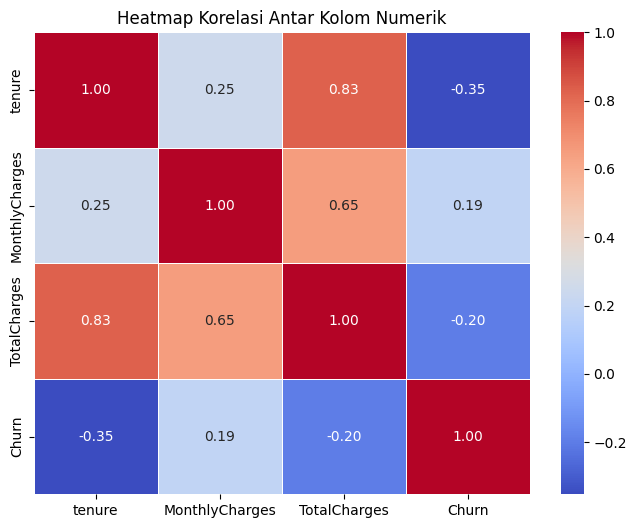

In [ ]:
plt.figure(figsize=(8, 6))

# Pilih hanya kolom numerik untuk perhitungan korelasi
numerical_df = df_processed.select_dtypes(include=['int64', 'float64'])

# Hitung matriks korelasi
correlation_matrix = numerical_df.corr()

# Buat heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,      # Tampilkan nilai korelasi di heatmap
    cmap='coolwarm', # Skema warna (misalnya 'coolwarm', 'viridis', 'RdBu')
    fmt=".2f",       # Format angka korelasi (2 angka di belakang koma)
    linewidths=.5    # Garis pemisah antar sel
)

plt.title('Heatmap Korelasi Antar Kolom Numerik')
plt.show()

Hubungan dengan Churn:

tenure memiliki hubungan terkuat dengan Churn (korelasi negatif), menjadikannya fitur yang sangat penting.
MonthlyCharges memiliki korelasi positif yang lemah dengan Churn.
TotalCharges memiliki korelasi negatif yang lemah dengan Churn.

Hubungan antar fitur:

Fitur yang paling potensial untuk dipertimbangkan di-drop karena redundansi (korelasi tinggi) adalah TotalCharges atau tenure. Berdasarkan korelasi yang sedikit lebih tinggi dengan Churn, tenure mungkin lebih disukai untuk dipertahankan, tetapi TotalCharges juga mengandung informasi tentang MonthlyCharges

Berdasarkan hasil EDA, fitur yang dipertahankan diantaranya yaitu:
- tenure : karena Memiliki korelasi negatif yang paling kuat dengan Churn (-0.35) di antara fitur numerik. Boxplot dan KDE plot juga menunjukkan perbedaan distribusi yang jelas antara pelanggan yang churn dan tidak churn (pelanggan yang churn cenderung memiliki tenure yang lebih rendah)
- MonthlyCharges : Memiliki korelasi positif yang lemah dengan Churn (0.19). Barplot dan KDE plot menunjukkan perbedaan distribusi MonthlyCharges antara kelompok Churn dan Non-Churn. Pelanggan dengan biaya bulanan lebih tinggi cenderung sedikit lebih banyak yang churn
- SeniorCitizen : Pelanggan yang bukan merupakan Senior Citizen cenderung memiliki tingkat churn yang lebih tinggi.
- Contract : salah satu prediktor terkuat. Pelanggan dengan kontrak 'Month-to-month' memiliki tingkat churn yang jauh lebih tinggi dibandingkan kontrak 'One year' atau 'Two year'.
- InternetService : Pelanggan dengan 'Fiber optic' memiliki tingkat churn yang jauh lebih tinggi dibandingkan dengan 'DSL' atau 'No internet service'.
- PaymentMethod : Pengguna 'Electronic check' memiliki tingkat churn yang jauh lebih tinggi, sedangkan metode pembayaran otomatis ('Bank transfer (automatic)', 'Credit card (automatic)') memiliki tingkat churn yang sangat rendah.
- OnlineSecurity : pelanggan yang tidak berlangganan layanan ini memiliki tingkat churn yang lebih tinggi. Ini menunjukkan bahwa layanan-layanan ini berfungsi sebagai faktor retensi yang kuat.
- OnlineBackup : pelanggan yang tidak berlangganan layanan ini memiliki tingkat churn yang lebih tinggi. Ini menunjukkan bahwa layanan-layanan ini berfungsi sebagai faktor retensi yang kuat.
- DeviceProtection : pelanggan yang tidak berlangganan layanan ini memiliki tingkat churn yang lebih tinggi. Ini menunjukkan bahwa layanan-layanan ini berfungsi sebagai faktor retensi yang kuat.
- TechSupport : pelanggan yang tidak berlangganan layanan ini memiliki tingkat churn yang lebih tinggi. Ini menunjukkan bahwa layanan-layanan ini berfungsi sebagai faktor retensi yang kuat.
- StreamingTV : pelanggan yang tidak berlangganan layanan ini memiliki tingkat churn yang lebih tinggi. Ini menunjukkan bahwa layanan-layanan ini berfungsi sebagai faktor retensi yang kuat.
- StreamingMovies : pelanggan yang tidak berlangganan layanan ini memiliki tingkat churn yang lebih tinggi. Ini menunjukkan bahwa layanan-layanan ini berfungsi sebagai faktor retensi yang kuat.
- Partner : Pelanggan tanpa partner cenderung memiliki tingkat churn yang lebih tinggi.
- Dependents :Pelanggan tanpa tanggungan cenderung memiliki tingkat churn yang lebih tinggi.
- PaperlessBilling : Pelanggan yang menggunakan PaperlessBilling menunjukkan tingkat churn yang lebih tinggi.

Dari daftar fitur tersebut, maka fitur yang perlu di drop adalah :    
- CustomerID : kolom pengidentifikasi unik untuk setiap pelanggan. Ia tidak mengandung informasi prediktif apa pun tentang churn itu sendiri, melainkan hanya sebagai label atau kunci.
- TotalCharges : Memiliki korelasi yang sangat tinggi dengan tenure (0.83). Ini menunjukkan adanya multikolinearitas yang kuat.
- Gender : Analisis barplot Churn by gender dengan jelas menunjukkan bahwa proporsi churn hampir identik antara pelanggan pria dan wanita. Ini berarti gender tidak memiliki kemampuan prediktif yang signifikan terhadap churn. Meng-drop fitur ini akan menyederhanakan model tanpa kehilangan informasi penting.
- PhoneService : Mayoritas pelanggan memiliki layanan telepon ('Yes'), dan meskipun ada churn di kelompok ini, tidak ada perbedaan pola churn yang sangat mencolok dibandingkan dengan tidak memiliki layanan telepon. Informasi yang lebih relevan terkait layanan telepon tampaknya sudah tercakup dalam MultipleLines (meskipun MultipleLines sendiri bukan prediktor yang sangat kuat). Dalam konteks yang lebih luas, PhoneService mungkin tidak menambah nilai prediktif yang substansial.

#Feature Selection

In [ ]:
#Drop kolom "customerID"
df_processed = df_processed.drop(columns=['customerID'])

#One-Hot Encoding

categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
df_encoded = pd.get_dummies(df_processed, columns=categorical_cols)

In [ ]:
# Pisah feature dan target
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

In [ ]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Lihat hasil
scores = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': selector.scores_,
    'p_Value': selector.pvalues_
}).sort_values(by='F_Score', ascending=False)

print(scores)

# Menampilkan fitur terbaik
selected_features = X.columns[selector.get_support()]
print("Fitur Terpilih:", selected_features.tolist())

                                    Feature      F_Score        p_Value
37                  Contract_Month-to-month  1382.340697  1.991701e-276
0                                    tenure   997.268010  7.999058e-205
19                        OnlineSecurity_No   936.566070  3.197002e-193
28                           TechSupport_No   903.785170  6.413692e-187
17              InternetService_Fiber optic   738.046042  1.200784e-154
39                        Contract_Two year   707.919254  1.048134e-148
44           PaymentMethod_Electronic check   706.195028  2.296890e-148
22                          OnlineBackup_No   544.868484  3.865357e-116
25                      DeviceProtection_No   479.401833  7.329625e-103
32          StreamingTV_No internet service   385.698588   1.200504e-83
35      StreamingMovies_No internet service   385.698588   1.200504e-83
18                       InternetService_No   385.698588   1.200504e-83
26     DeviceProtection_No internet service   385.698588   1.200

Untuk fitur selection digunakan Anova untuk melihat hubungan linear fitu-fitur dengan kolom target yaitu Churn.

- Semakin tinggi F_score yang dihasilkan semakin membuktikan pengaruh terhadap target kolom.
- Semakin kecil p-value (<0,05), semakin kuat bukti bahwa fitur tersebut memang berpengaruh signifikan terhadap target. Nilai p-value menyatakan peluang bahwa hubungan antara fitur dan target terjadi karena kebetulan semata (null hypothesis).

#Feature Engineering

In [ ]:
#rasio biaya bulanan terhadap total
df_processed['MonthlyToTotalRatio'] = df_processed['MonthlyCharges'] / df['TotalCharges']
df_processed['MonthlyToTotalRatio'] = df_processed['MonthlyToTotalRatio'].fillna(0)

#Binning untuk Tenure
df_processed['tenure_group'] = pd.cut(df_processed['tenure'], bins=[0, 12, 24, 48, 72], labels=['0-1yr', '1-2yr', '2-4yr', '4-6yr'])
df_processed = pd.get_dummies(df_processed, columns=['tenure_group'], drop_first=True)

Ada 2 feature yang mungkin dapat ditambahkan :
1. Rasio Biaya Bulanan terhadap Total Biaya (MonthlyToTotalRatio), yang menunjukkan proporsi pengeluaran rutin tiap bulannya terhadap keseluruhan tagihan. Dari sini bisa dilihat potensi pengaruh proporsi ini terhadap kemungkinan churn
2. Pengelompokkan tenure kedalam periode-periode tertentu (tenure_group). Dari sini bisa dilihat potensi periode tenure ini terhadap kemungkinan churn

In [ ]:
# Encoding ulang
categorical_cols_new = df_processed.select_dtypes(include=['object']).columns.tolist()
df_final = pd.get_dummies(df_processed, columns=categorical_cols_new)

In [ ]:
df_final.head()

,tenure,MonthlyCharges,TotalCharges,Churn,MonthlyToTotalRatio,tenure_group_1-2yr,tenure_group_2-4yr,tenure_group_4-6yr,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1.000000,False,False,False,True,False,True,False,False,True,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False
1,34,56.95,1889.50,0,0.030140,False,True,False,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,1,0.497920,False,False,False,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,0,0.022980,False,True,False,False,True,True,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,1,0.466205,False,False,False,True,False,True,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False


#Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan target
X = df_final.drop(columns=['Churn'])
y = df_final['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Periksa banyak data masing-masing
print(f'Banyak data latih = {X_train.shape[0]}')
print(f'Banyak data test  = {X_test.shape[0]}')

Banyak data latih = 5634
Banyak data test  = 1409


#Handling Imbalance

In [ ]:
#Handling imbalance pada data train
print(f'Jumlah Churn = {y_train.value_counts()[1]}')
print(f'Jumlah Non-Churn = {y_train.value_counts()[0]}')

Jumlah Churn = 1496
Jumlah Non-Churn = 4138


Karena terdapat perbedaan yang signifikan dari label target maka perlu dilakukan handling imbalance pada data train agar mencegah dominasi dari data yang lebih besar.

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Cek proporsi setelah SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: Churn
0    4138
1    1496
Name: count, dtype: int64
After SMOTE: Churn
0    4138
1    4138
Name: count, dtype: int64


Insight Bisnis & Model Dengan data seimbang, model lebih adil dalam memprediksi pelanggan yang berpotensi churn.

Ini sangat penting jika perusahaan ingin mencegah kehilangan pelanggan (misalnya dengan promo khusus atau intervensi).

SMOTE membantu memastikan bahwa kelas minoritas tidak diabaikan oleh algoritma

#Training model & prediksi churn sebagai variabel target

#Definisi Function

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_resampled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_resampled)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_resampled, y_pred_proba_train[:, 1]))
    #
    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

#1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
eval_classification(rf)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.60
Recall (Test Set): 0.58
F1-Score (Test Set): 0.59
roc_auc (test-proba): 0.83
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9999480169621379
roc_auc (crossval test): 0.8223804468769949


Nilai untuk precision, accuracy, dan recall terlihat cukup tinggi dan seimbang begitu juga dengan nilai F1-score yang menunjukan cukup seimbang antara nilai precision dan recall. Namun model masih overfitting pada data train dengan nilai roc-auc tinggi yaitu 1. Untuk itu dilakukan hyperparameter turning.

#Menggunakan learning curve untuk mencari nilai parameter yang tepat

param value: 1; train: 0.8508457374751827; test: 0.8441896032378606
param value: 2; train: 0.860016916384727; test: 0.8536855507364891
param value: 3; train: 0.8683087247804772; test: 0.8557894355481487
param value: 4; train: 0.8757037884151907; test: 0.857925667912263
param value: 5; train: 0.8873699092287564; test: 0.8581922117444907
param value: 6; train: 0.8998854993306097; test: 0.8617245644725537
param value: 7; train: 0.9133350939237206; test: 0.8629861190182905
param value: 8; train: 0.9292734983335906; test: 0.8612238243605536
param value: 9; train: 0.9439773383751159; test: 0.8597862991294627
param value: 10; train: 0.9576098443711293; test: 0.8592234517167492


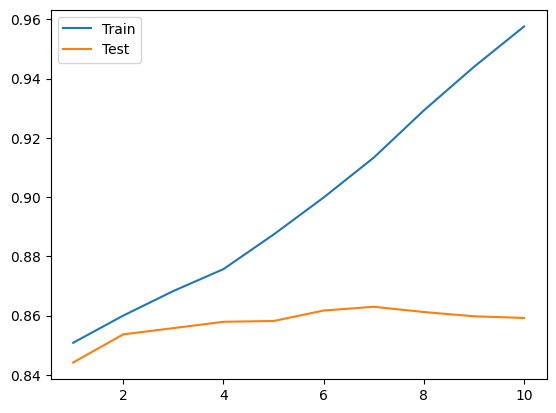

In [ ]:
#learning curve
param_values = [int(x) for x in np.linspace(1, 10, 10)] # n_estimators
#param_values = [int(x) for x in np.linspace(100, 200, 10)] # max_depth didapat nilai yang tepat = 2,3
#param_values = [int(x) for x in np.linspace(50, 250, 10)] # min_samples_split = 300
#param_values = [int(x) for x in np.linspace(100, 200, 10)] # min_samples_leaf = 200

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=100, max_depth=c)
    model.fit(X_train_resampled, y_train_resampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train_resampled)
    train_auc = roc_auc_score(y_train_resampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test_scaled)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

In [ ]:
#Hyperparameter turning Randomforest
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100] #masing-masing nilai parameter dari learning curve
criterion = ['gini', 'entropy']
max_features = ['sqrt', 'log2']
max_depth = [2,3]
min_samples_split = [300]
min_samples_leaf = [200]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_features=max_features, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs.fit(X_train_resampled, y_train_resampled)
eval_classification(rs)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.54
Recall (Test Set): 0.82
F1-Score (Test Set): 0.65
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.86
roc_auc (crossval train): 0.8424850010264795
roc_auc (crossval test): 0.8371369793140756


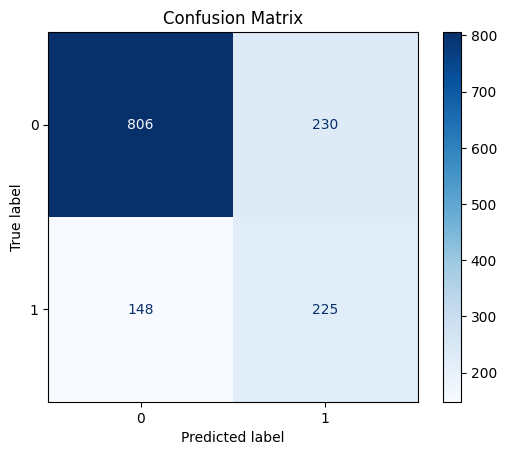

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Visualisasi confusion matrix langsung dari model
ConfusionMatrixDisplay.from_estimator(rs, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

hasil dari hyperparameter turning :
- Recall tinggi (0.82) → sangat bagus untuk mendeteksi customer yang akan churn (positif class).

- Precision tidak terlalu tinggi, tapi masih moderat (0.54).

- Tidak terjadi overfitting → ROC AUC train dan test seimbang.

- Stabil pada cross-validation (train & test mirip).

Hasil matriks confussion: <br>

|                             | **Predicted: Tidak Churn (0)**  | **Predicted: Churn (1)**        |
| --------------------------- | ------------------------------- | ------------------------------- |
| **Actual: Tidak Churn (0)** | **806** *(True Negative - TN)*  | **230** *(False Positive - FP)* |
| **Actual: Churn (1)**       | **148** *(False Negative - FN)* | **225** *(True Positive - TP)*  |


Model cukup baik dalam mengenali pelanggan yang tidak churn (TN tinggi).Namun ada risiko besar pada FN = 148, yang berarti banyak pelanggan yang churn tapi tidak terdeteksi.

#2. XGBoost

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train_resampled, y_train_resampled)
eval_classification(xg)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.61
Recall (Test Set): 0.58
F1-Score (Test Set): 0.60
roc_auc (test-proba): 0.84
roc_auc (train-proba): 0.99
roc_auc (crossval train): 0.9860611188854751
roc_auc (crossval test): 0.8198720869588831


Hasil tidak berbeda jauh dengan randomforest sebelum dilakukan hyperparameter turning, masih menunjukan overfitting pada nilai roc-auc data train. Untuk itu dilakukan hyperparameter turning juga.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [2,3],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train_resampled, y_train_resampled)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.57
Recall (Test Set): 0.78
F1-Score (Test Set): 0.65
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.92
roc_auc (crossval train): 0.8700502595721484
roc_auc (crossval test): 0.8443795084133405


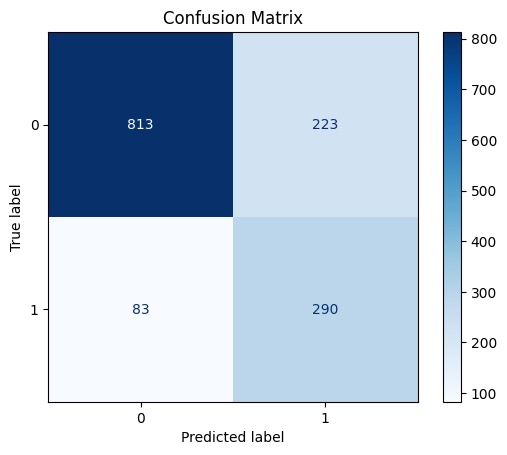

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Visualisasi confusion matrix langsung dari model
ConfusionMatrixDisplay.from_estimator(xg_tuned, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Hasil hyperparameter turning menunjukan :
- Akurasi dan precision lebih tinggi dari Random Forest.

- Recall sedikit lebih rendah (0.78) dari Random Forest, tapi tetap tinggi.

- ROC AUC Test sama (0.86), tapi ROC AUC Train cukup tinggi (0.92) → sedikit overfitting.

- Namun, cross-validation tetap kuat dan seimbang → model generalisasi bagus.

Hasil Matrik Confussion :<br>

|                             | **Predicted: Tidak Churn (0)** | **Predicted: Churn (1)**      |
| --------------------------- | ------------------------------ | ----------------------------- |
| **Actual: Tidak Churn (0)** | **813** (True Negative - TN)   | **223** (False Positive - FP) |
| **Actual: Churn (1)**       | **83** (False Negative - FN)   | **290** (True Positive - TP)  |


Model ini memberikan keseimbangan tinggi antara akurasi dan recall, cocok

---

digunakan untuk strategi retensi pelanggan karena mampu mengenali pelanggan berisiko churn secara cukup akurat. False Negative rendah (FN = 83) → risiko kehilangan pelanggan tanpa tindakan lebih kecil dibanding sebelumnya. False Positive (FP = 223) masih ada, namun trade-off ini wajar jika fokusnya adalah mencegah churn.



#Model KNeighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train_resampled, y_train_resampled) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.46
Recall (Test Set): 0.75
F1-Score (Test Set): 0.57
roc_auc (test-proba): 0.77
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.8879055141985251
roc_auc (crossval test): 0.744834684944311


Model menghasilkan eror yang cukup besar karena selisih hasil dari data train dan tes berbeda jauh. Hasilnya terlihat overfitting. dilakukan hyperparameter turning

Accuracy (Test Set): 0.73
Precision (Test Set): 0.49
Recall (Test Set): 0.60
F1-Score (Test Set): 0.54
roc_auc (test-proba): 0.76
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.8387706043241124
roc_auc (crossval test): 0.8081376839249097


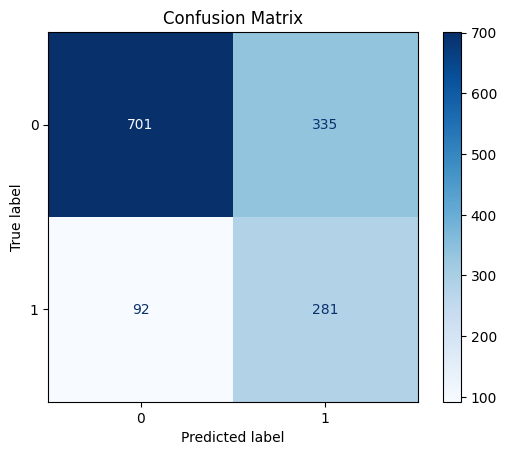

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train_resampled, y_train_resampled)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train_resampled, y_train_resampled)
eval_classification(rs)

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Visualisasi confusion matrix langsung dari model
ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Hasil dari hyperparameter turning menunjukan:
- Recall dan precision paling rendah di antara ketiganya → kurang bagus untuk deteksi churn.

- Train ROC AUC sangat tinggi (0.98) → overfitting parah.

- Generalisasi lemah (gap besar antara train dan test).

- Akurasi pun lebih rendah dari RF dan XGBoost.

Hasil Matriks Confussion : <br>

|                             | **Predicted: Tidak Churn (0)** | **Predicted: Churn (1)**      |
| --------------------------- | ------------------------------ | ----------------------------- |
| **Actual: Tidak Churn (0)** | **701** (True Negative - TN)   | **335** (False Positive - FP) |
| **Actual: Churn (1)**       | **92** (False Negative - FN)   | **281** (True Positive - TP)  |


False Positive (FP = 335) cukup tinggi → artinya banyak pelanggan yang diprediksi akan churn padahal tidak (berisiko menimbulkan biaya retensi yang tidak perlu). False Negative (FN = 92) tergolong rendah → berarti pelanggan yang benar-benar churn sebagian besar teridentifikasi. Meskipun recallnya tinggi untuk deteksi churn namun FP-nya juga tinggi mengakibatkan kurang efisien secara biaya menyebabkan model kurang efisien.

#Kesimpulan

Karena ini adalah kasus customer churn, kita ingin:

- Recall tinggi → agar sebanyak mungkin customer yang akan churn bisa dideteksi.

- F1-Score stabil → agar balance antara recall dan precision.

- Generalization kuat → dilihat dari ROC AUC dan hasil cross-validation.

| Model             | Kelebihan                                            | Kekurangan                                     | Status                     |
| ----------------- | ---------------------------------------------------- | ---------------------------------------------- | -------------------------- |
| **Random Forest** | Recall tertinggi (0.82), hasil stabil, tidak overfit | Precision sedang, akurasi sedikit di bawah XGB | ✅ Sangat bagus             |
| **XGBoost**       | Akurasi & precision tertinggi, ROC AUC bagus         | Sedikit overfitting, recall sedikit turun      | 🏆 **Model Akhir Terbaik** |
| KNN               | Mudah dipahami, cepat training kecil                 | Recall & precision rendah, overfitting parah   | ❌ Tidak layak              |


Berdasarkan analisis dari masing-masing model, ditentukan model terbaik XG Boost Karena F1-score sama dengan Random Forest (0.65), tapi akurasinya lebih tinggi, precision lebih baik, dan hasil cross-validation kuat. Recall penting, karena kita ingin menangkap sebanyak mungkin pelanggan yang akan pergi, namun bukan satu-satunya metrik penting. Model yang terlalu fokus pada recall saja bisa menghasilkan banyak false positive. False positive artinya kita salah menarget pelanggan setia seolah mereka akan churn akan menebabkan buang-buang resources (diskon, campaign) yang merugikan perusahaan. Maka dari itu model XG boost lebih baik.

#Rekomendasi Bisnis

#Feature Importance

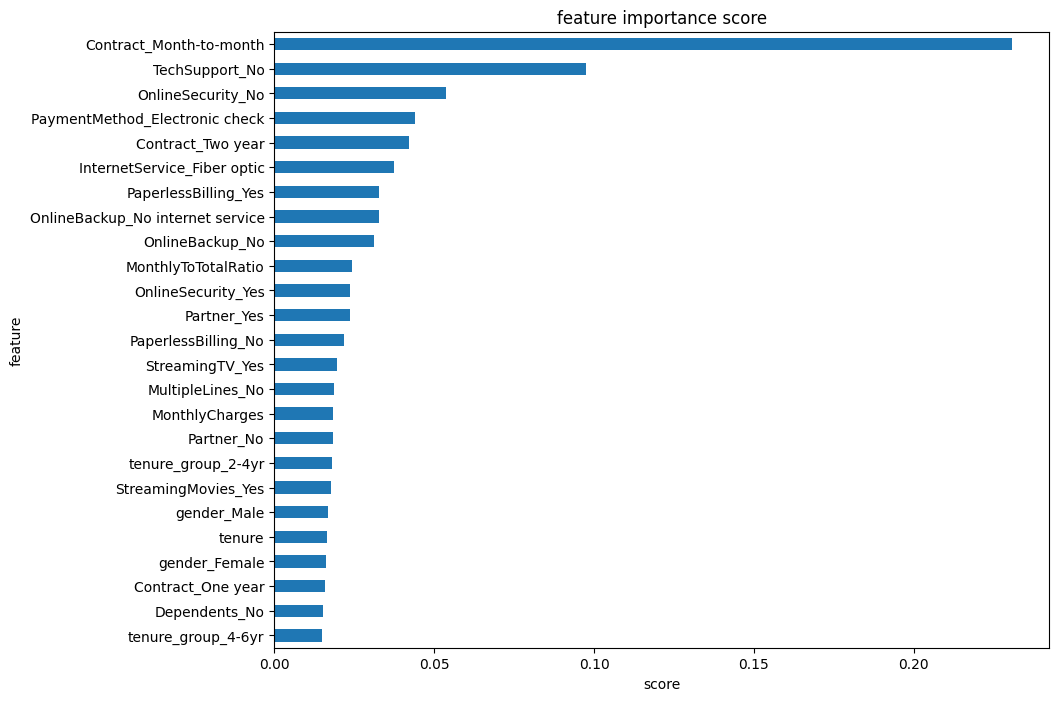

In [ ]:
show_feature_importance(xg_tuned.best_estimator_)

Insight dari Feature importance:<br>
Berdasarkan grafik feature importance dari model prediksi customer churn, kita bisa mengidentifikasi faktor-faktor utama yang paling berkontribusi terhadap kemungkinan pelanggan berhenti berlangganan. Dari grafik terlihat Contract_Month-to-month paling tinggi resiko churn. Sementara tenure grup 4-6 tahun paling rendah melakukan churn atau lebih loyal.

Rekomendasi Bisnis dari feature importance:<br>
Berdasarkan analisis feature importance dari model prediksi customer churn, ditemukan bahwa pelanggan dengan kontrak bulanan, tidak menggunakan layanan seperti Tech Support dan Online Security, serta menggunakan metode pembayaran manual seperti electronic check memiliki risiko churn yang lebih tinggi. Hal ini menunjukkan bahwa fleksibilitas kontrak dan kurangnya engagement terhadap layanan tambahan menjadi faktor utama pelanggan berhenti. Selain itu, pelanggan pengguna layanan Fiber Optic dan Paperless Billing juga menunjukkan kecenderungan churn, yang mungkin disebabkan oleh ekspektasi tinggi terhadap kualitas layanan atau ketidakjelasan informasi tagihan.

Untuk mengurangi churn, perusahaan disarankan untuk menawarkan insentif bagi pelanggan kontrak bulanan agar beralih ke kontrak jangka panjang, serta mengedukasi dan mendorong penggunaan layanan tambahan seperti keamanan dan dukungan teknis. Selain itu, metode pembayaran otomatis dan transparansi dalam sistem penagihan dapat meningkatkan loyalitas pelanggan. Upaya ini akan membantu meningkatkan kepuasan pelanggan dan mempertahankan basis pelanggan yang ada secara lebih efektif.

#Analisis Shap Value

In [ ]:
!pip install shap

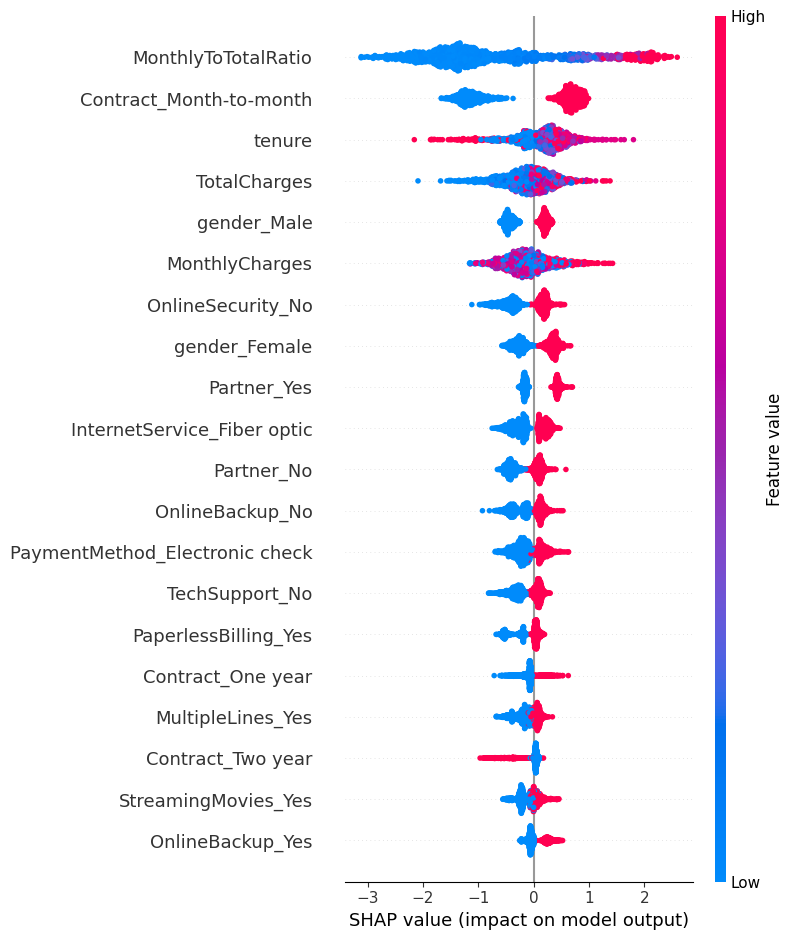

In [ ]:
import shap
explainer = shap.TreeExplainer(xg)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test) # Summary shap value terhadap label positive

Insight SHAP Summary Plot:

- MonthlyToTotalRatio: Nilai tinggi (merah) → cenderung meningkatkan prediksi churn. Artinya, pelanggan yang biaya bulanannya besar dibanding total biaya (artinya berlangganan sebentar atau baru) lebih cenderung churn.

- Contract_Month-to-month:
Nilai 1 (merah) sangat mendorong ke arah churn artinya kontrak jangka pendek (bulanan) sangat berisiko churn.

- Tenure: Nilai rendah (biru) mendorong churn. Semakin pendek masa berlangganan pelanggan, semakin tinggi kemungkinan mereka untuk berhenti.

- TotalCharges & MonthlyCharges: TotalCharges rendah (biru) cenderung ke churn → pelanggan baru dengan sedikit akumulasi tagihan lebih berisiko.

- MonthlyCharges tinggi (merah) juga cenderung ke churn, mungkin karena harga yang tinggi tidak sesuai dengan ekspektasi.

- OnlineSecurity_No dan TechSupport_No: Nilai 1 (merah) pelanggan tanpa layanan ini lebih cenderung churn.

Rekomendasi bisnis berdasarkan SHAP summary plot:<br>
- Fokus retensi harus diarahkan pada pelanggan baru, dengan kontrak bulanan, dan yang tidak menggunakan fitur tambahan seperti keamanan online (Online Security) dan dukungan teknis (Tech support).

- Perusahaan dapat menawarkan insentif untuk kontrak tahunan, edukasi manfaat dari layanan tambahan, serta promo khusus untuk pelanggan dengan tagihan bulanan tinggi.

- Segmentasi pelanggan berdasarkan tenure dan jenis layanan bisa menjadi strategi proaktif untuk mencegah churn lebih awal